In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

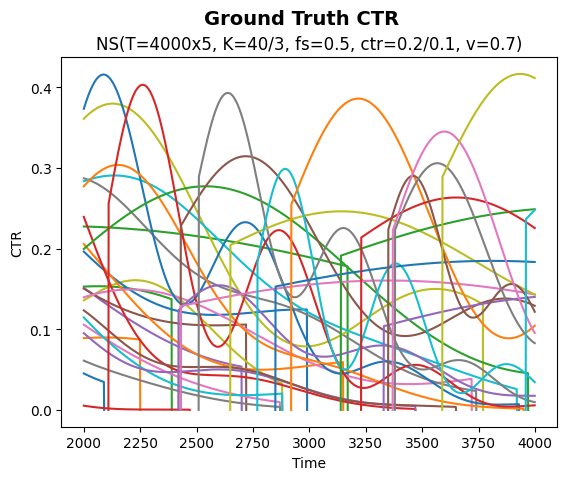

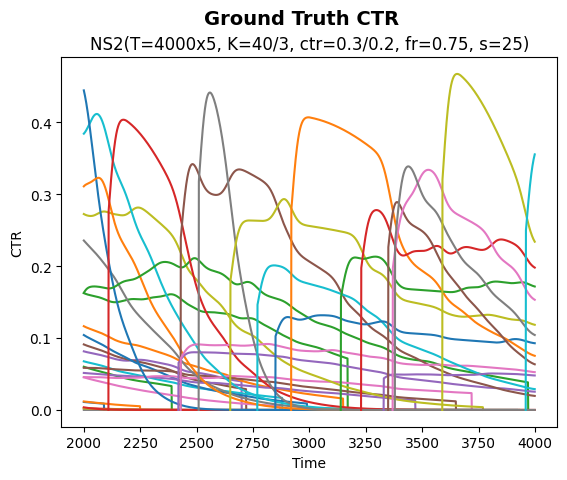

In [12]:
s1 = NewsSimulationSetting(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    falloff_speed=0.5, 
    ctr_base=0.2,
    ctr_fuzz=0.1
)
s2 = NewsSimulationSetting2(
    SettingConfig(4000, 40, 3, 5),
    lifetime=2000,
    smoothing=25,
    falloff_rate=0.75,
    ctr_base=0.3,
    ctr_fuzz=0.2
)
s1.visualize(tmin=2000)
s2.visualize(tmin=2000)

In [13]:
sim = Simulator(run_count=200, seed_change_interval=5)

In [14]:
for s in [s1, s2]:
    sim.set_setting(s)
    sim.run_oracle()
    
    sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': 0.1, 'q0': 1})
    sim.run_agent(ThompsonAgent, {})
    sim.run_agent(ThompsonAgent, {'ws': 3000})
    sim.run_agent(FroomleAgent, {'boost_denominator':500, 'boost_rank':2})
    sim.run_agent(FroomleAgent, {'boost_denominator':50, 'boost_rank':2, 'ws':3000})

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 NS(T=4000x5, K=40/3, fs=0.5, ctr=0.2/0.1, v=0.7) 
     809.2 ±29.8       - SW-FR(d=50, r=2, ws=3000)
    1176.4 ±16.2       - SW-TS(ws=3000)
    1352.0 ±47.7       - FR(d=500, r=2)
    1589.5 ±45.4       - TS()
    1678.7 ±14.9       - EG(eps=0.1, lr=0.1, q0=1)

 NS2(T=4000x5, K=40/3, ctr=0.3/0.2, fr=0.75, s=25) 
     926.0 ±33.9       - SW-FR(d=50, r=2, ws=3000)
     999.8 ±17.1       - SW-TS(ws=3000)
    1376.8 ±46.6       - FR(d=500, r=2)
    1495.6 ±16.4       - EG(eps=0.1, lr=0.1, q0=1)
    1761.6 ±47.4       - TS()



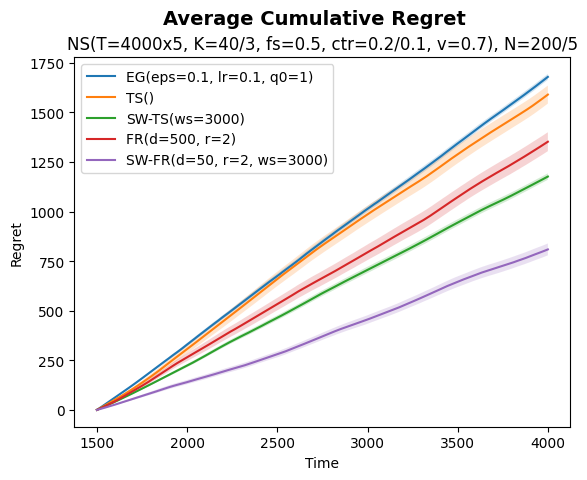

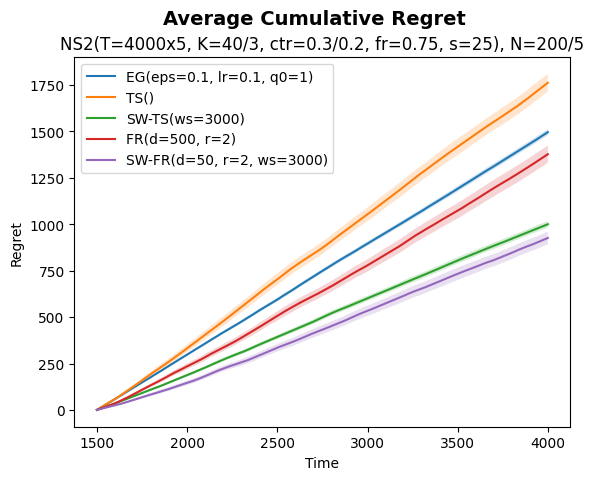

In [17]:
sim.results.rank(tmin=1500)
sim.results.create_regret_plot(tmin=1500)